## Imports

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from PIL import Image
import matplotlib.pyplot as plt
import os

# Read the Dataset

We have started by reading in the dataset.

In [ ]:
df = pd.read_csv('data/train_data_2024.csv')
df.head()

,FileName,Class,MoreThanOnePerson,HighLevelCategory
0,Img_460.jpg,blowing_bubbles,YES,Social_LeisureActivities
1,Img_8152.jpg,blowing_bubbles,YES,Social_LeisureActivities
2,Img_9056.jpg,jumping,YES,Sports_Recreation
3,Img_3880.jpg,pushing_a_cart,YES,OutdoorActivities
4,Img_3168.jpg,writing_on_a_book,NO,Artistic_MusicalActivities


Next I have unzipped the images into a separate folder.

In [ ]:
!rm -r /content/Images
!unzip data/Images.zip -d .

In [ ]:
df['FileName'] = 'Images/' + df['FileName'] # renaming the file names to the correct folder

## Initial Split

In [ ]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split
dfo, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 4137 to 860
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FileName           3600 non-null   object
 1   Class              3600 non-null   object
 2   MoreThanOnePerson  3600 non-null   object
 3   HighLevelCategory  3600 non-null   object
dtypes: object(4)
memory usage: 140.6+ KB


Observations:
* There are no NaN values present.

# **Image Format Analysis**

Lets take a brief look at the format of the Images. This can be done by loading and displaying images along with their data to get a basic understanding of the data.

FileName             Images/Img_6056.jpg
Class                    walking_the_dog
MoreThanOnePerson                    YES
HighLevelCategory      OutdoorActivities
Name: 4137, dtype: object


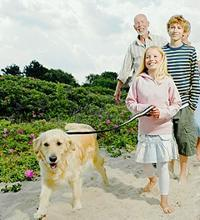

FileName                    Images/Img_8965.jpg
Class                            playing_guitar
MoreThanOnePerson                            NO
HighLevelCategory    Artistic_MusicalActivities
Name: 3525, dtype: object


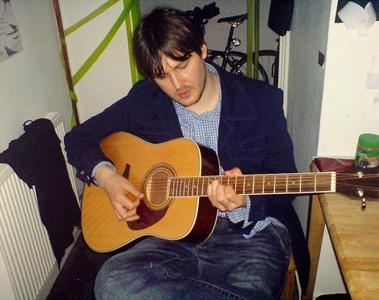

FileName             Images/Img_6632.jpg
Class                      riding_a_bike
MoreThanOnePerson                     NO
HighLevelCategory      Sports_Recreation
Name: 2652, dtype: object


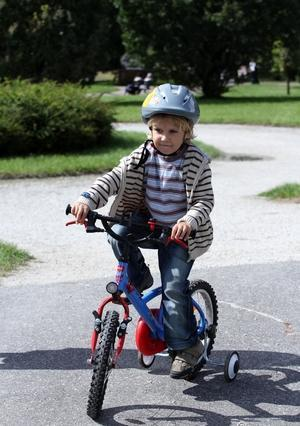

FileName             Images/Img_133.jpg
Class                     cutting_trees
MoreThanOnePerson                    NO
HighLevelCategory     MaintenanceRepair
Name: 605, dtype: object


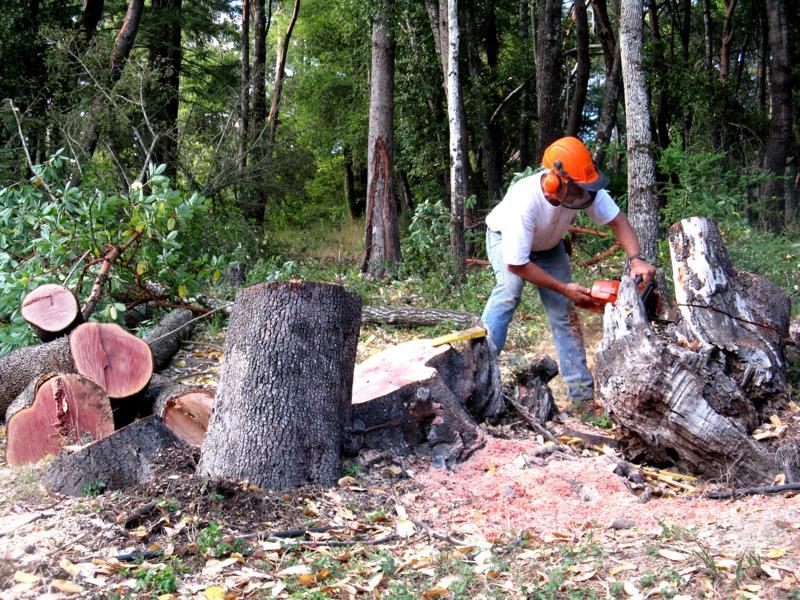

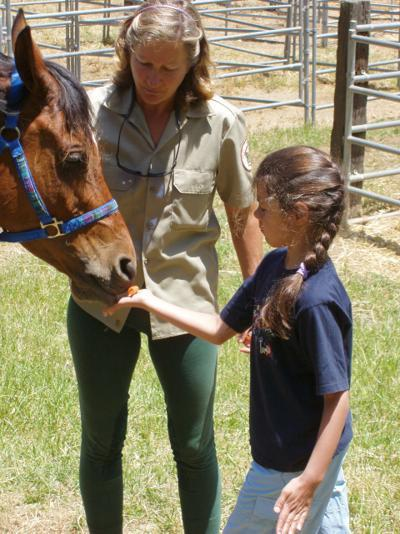

In [ ]:
from IPython.display import display, Image

# Display each image
for i in range(5):
    img_data = dfo.iloc[i]
    print(img_data)
    x = img_data['FileName']
    display(Image(filename=x))

Observations:


*   We can see that the images are coloured.
*   The images vary in size, this means that we may have to resize them later for better training.



# **EDA**

Lets perform some histogram plots to see the distribution of data based on the given features.

### Distribution by MoreThanOnePerson

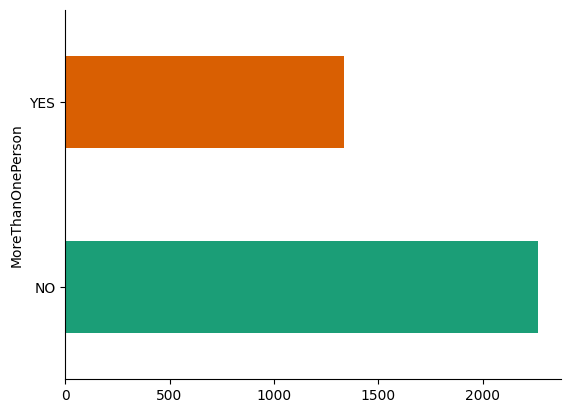

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
dfo.groupby('MoreThanOnePerson').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Observations:


*   Target Feature 'MoreThanOnePerson' has 2 values - 'YES' and 'NO'. This indicates that it it Binary.
*   'NO' has more Images than 'YES'. This indicates that there are more images with a single person in them.



### Distribution by Class

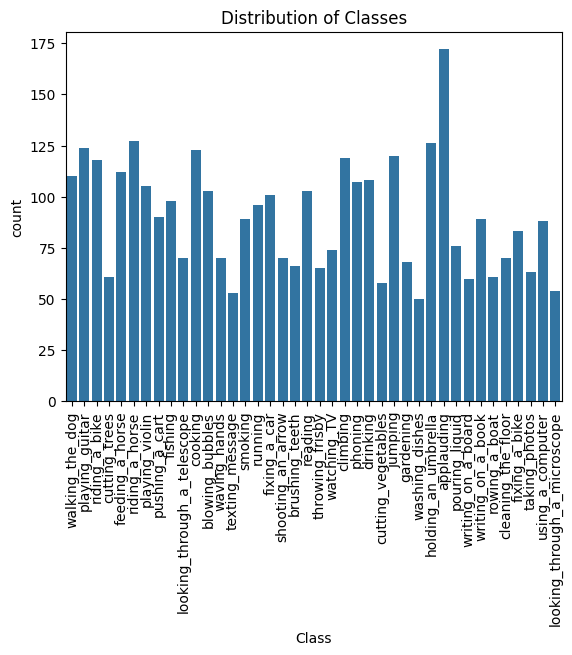

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=dfo)
plt.title('Distribution of Classes')
plt.xticks(rotation=90)
plt.show()


Observations:


*   Target Feature 'Class' has 40 values - 'YES' and 'NO'. This indicates that it it Multi-class.
*   The Class 'applauding' has the most images while 'texting_message' having the least. this shows some disparity in the dataset based on 'Class'.



### Distribution by HighLevelCategory

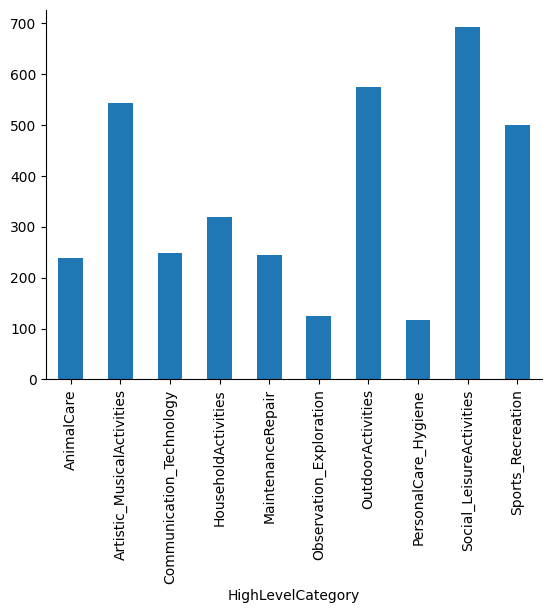

In [ ]:
dfo.groupby('HighLevelCategory').size().plot(kind='bar')
plt.gca().spines[['top', 'right',]].set_visible(False)

Observations:


*   Feature 'HighLevelCategory' has 10 values.
*   The categories 'Social_LeisureActivities', 'OutdoorActivities' and 'Artist_MusicalActivities' have the most with more than 600 images each.
*   The categories 'Observation_Exploration' and 'PersonalCare_Hygiene' have the least with less than 200 images each.





### Sample Visualization

We have already seen the images in brief, now let's take a look at some of the images from a particular class, 'blowing_bubbles' in this case to get a etter undertanding of patterns.

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

def plot_sample_images(df, class_name, n_samples=5):
    class_images = df[df['Class'] == class_name]['FileName']
    n_available = len(class_images)
    n_samples = min(n_samples, n_available)

    if n_samples > 0:
        sample_images = random.sample(list(class_images), n_samples)

        plt.figure(figsize=(10, 10))
        for i, img_name in enumerate(sample_images):
            img = Image.open(img_name)
            plt.subplot(1, n_samples, i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
        plt.show()
    else:
        print(f"No images found for class: {class_name}")

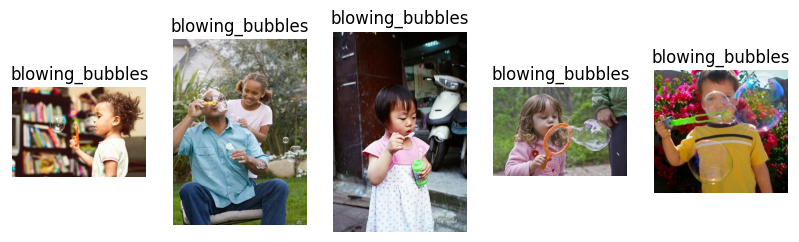

In [ ]:
plot_sample_images(dfo, class_name='blowing_bubbles')

Observations:


*   For 'blowing_bubbles', there seems to be the person's action captured from different angles.
*   The images seem to have one common feature that is the alignment of the person.

The above points are common in other classes as well (as seen before in the Image Format Analysis).


